In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot 
import pandas as pd

In [16]:
ticker=["AAPL","MSFT","SPMO","NVDA","TSLA"]
stocks=yf.download(ticker,start="2015-01-01",end="2025-06-01")
stocks=stocks.dropna()
stocks.columns=stocks.columns.to_flat_index()
stocks.columns=pd.MultiIndex.from_tuples(stocks.columns)
stocks.describe()                           #do simple analysis of stocks

Close                                                      \
              AAPL         MSFT         NVDA         SPMO         TSLA   
count  2423.000000  2423.000000  2423.000000  2423.000000  2423.000000   
mean    104.594050   202.041548    26.698049    47.708622   132.162259   
std      68.231400   126.066179    38.197673    20.594983   119.622352   
min      20.624046    40.675838     0.615250    20.950050     9.578000   
25%      40.257629    85.898037     4.125055    32.477234    19.695000   
50%     104.197533   196.913956    10.974077    45.006004   102.639999   
75%     163.505379   294.972641    26.496067    56.978668   235.885002   
max     258.103729   463.240967   149.405869   105.142075   479.859985   

              High                                                      ...  \
              AAPL         MSFT         NVDA         SPMO         TSLA  ...   
count  2423.000000  2423.000000  2423.000000  2423.000000  2423.000000  ...   
mean    105.641054   203.919014    27.197720    47.959856   135.168481  ...   
std      68.899102   127.155523    38.936850    20.758884   122.466522  ...   
min      20.927682    40.980822     0.623544    20.950050    10.331333  ...   
25%      40.665815    86.629801     4.186275    32.769616    20.098333  ...   
50%     107.187494   200.241085    11.100163    45.220302   105.666664  ...   
75%     165.639467   298.728461    26.983599    57.298120   239.671669  ...   
max     259.179926   464.023678   153.105279   106.070239   488.540009  ...   

              Open                                                      \
              AAPL         MSFT         NVDA         SPMO         TSLA   
count  2423.000000  2423.000000  2423.000000  2423.000000  2423.000000   
mean    104.488916   201.973810    26.700038    47.722016   132.190972   
std      68.150676   126.023484    38.237106    20.585894   119.729049   
min      20.546432    40.571270     0.604516    20.950050     9.488000   
25%      40.291047    85.888044     4.138386    32.536445    19.787333   
50%     102.300732   197.166075    10.954642    45.068588   101.267334   
75%     163.764226   294.749055    26.508768    56.998551   234.956673   
max     257.276679   462.686124   153.005289   105.990395   475.899994   

             Volume                                                          
               AAPL          MSFT          NVDA          SPMO          TSLA  
count  2.423000e+03  2.423000e+03  2.423000e+03  2.423000e+03  2.423000e+03  
mean   1.064418e+08  2.811312e+07  4.724899e+08  1.358164e+05  1.156637e+08  
std    5.891317e+07  1.273305e+07  2.546504e+08  4.957277e+05  7.416602e+07  
min    2.323470e+07  7.164500e+06  5.244800e+07  0.000000e+00  1.062000e+07  
25%    6.642595e+07  2.008805e+07  3.085820e+08  2.200000e+03  6.977550e+07  
50%    9.325140e+07  2.483830e+07  4.212120e+08  9.300000e+03  9.673560e+07  
75%    1.298752e+08  3.233185e+07  5.693320e+08  3.835000e+04  1.337874e+08  
max    5.334788e+08  1.352271e+08  3.692928e+09  1.430530e+07  9.140820e+08  

[8 rows x 25 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

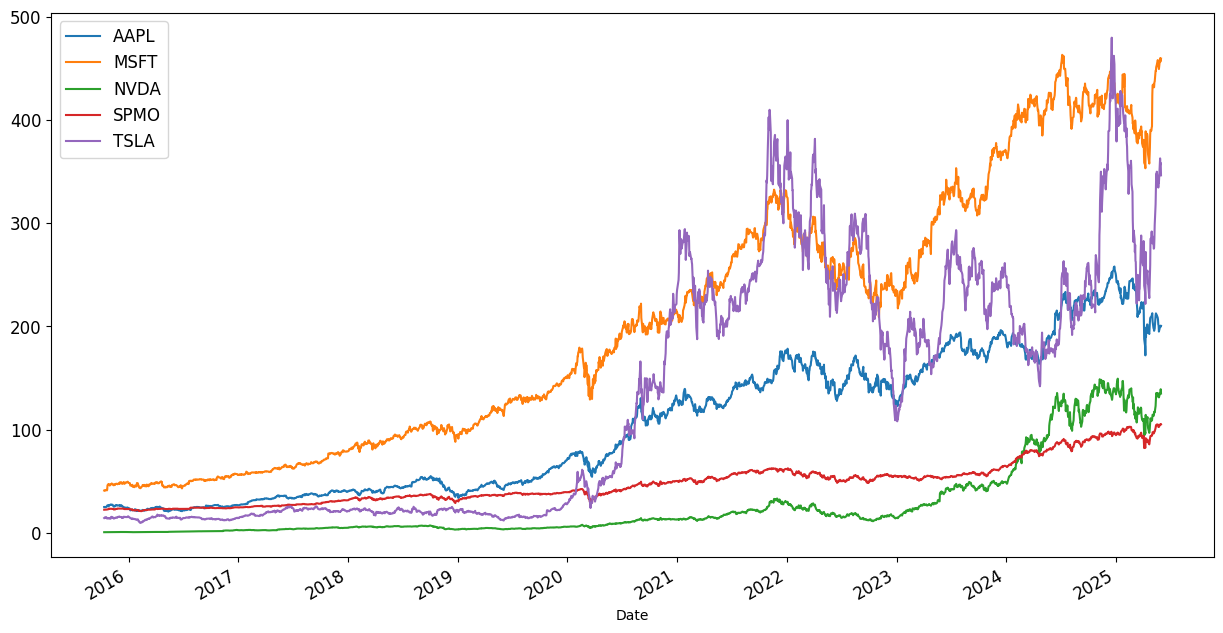

In [17]:
close=stocks.loc[:,"Close"].copy() #takes the close column and visualize them
import matplotlib.pyplot as plt
close.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

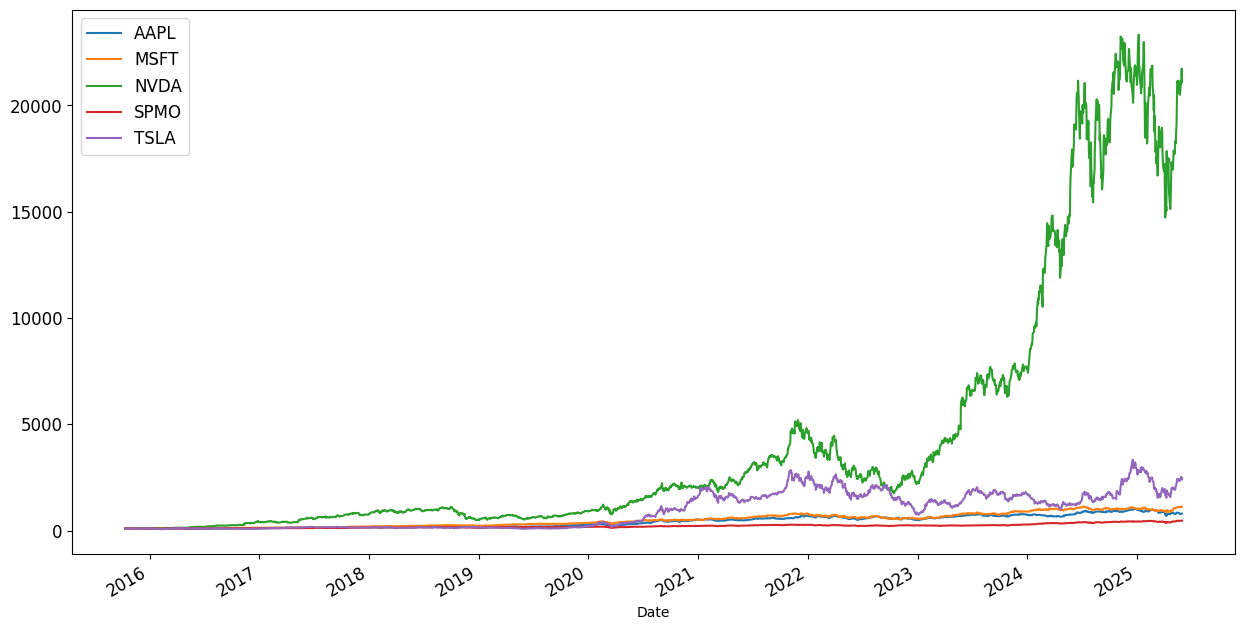

In [18]:
normclose=(close.div(close.iloc[0])*100).copy()
normclose.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show

In [19]:
ret=close.pct_change().dropna()
ret.head()

,AAPL,MSFT,NVDA,SPMO,TSLA
Date,,,,,
2015-10-13,0.001702,-0.002340,0.001897,0.000000,0.017024
2015-10-14,-0.014133,-0.004478,0.036364,0.000000,-0.010810
2015-10-15,0.014971,0.007069,0.002559,0.000000,0.020426
2015-10-16,-0.007330,0.010636,0.015676,0.005955,0.025756
2015-10-19,0.006214,0.002315,-0.001795,0.000000,0.004802


In [20]:
summary=ret.describe().T.loc[:,['mean','std']]
summary

,mean,std
AAPL,0.001030,0.018519
MSFT,0.001146,0.017185
NVDA,0.002714,0.031848
SPMO,0.000719,0.012670
TSLA,0.002012,0.037460


Text(0.5, 1.0, 'Risk/return')

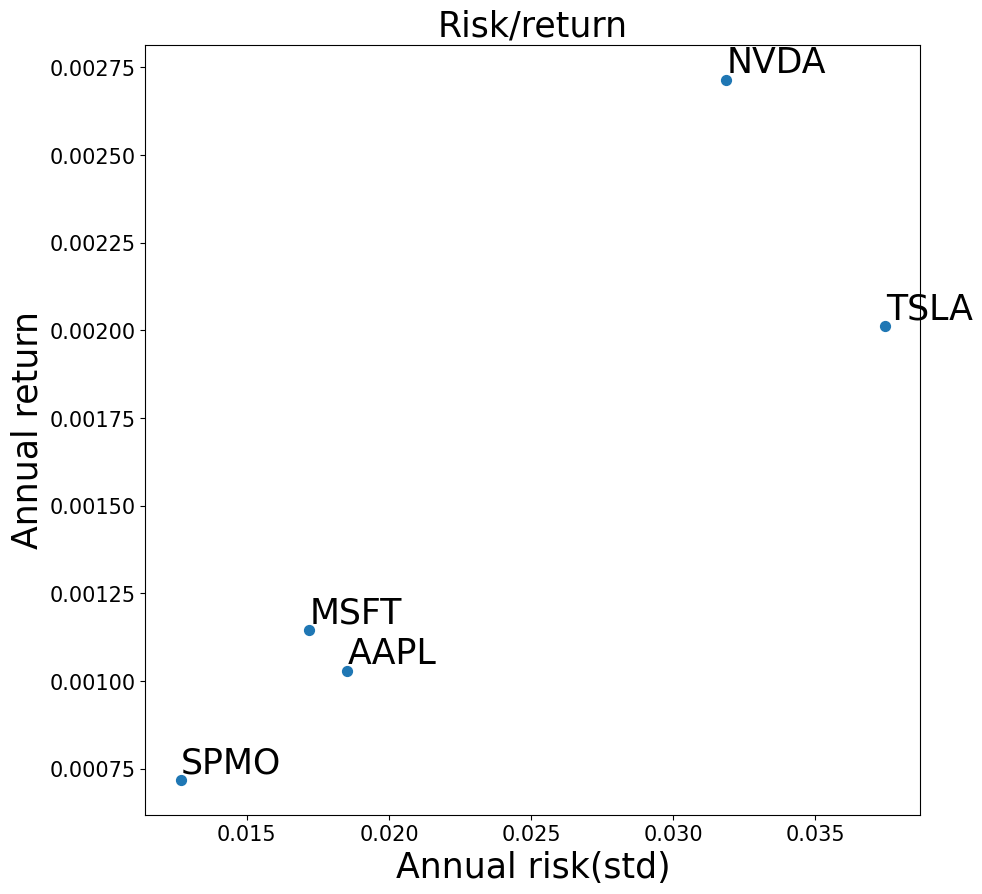

In [26]:
summary.plot.scatter(x="std",y="mean",figsize=(10,10),s=50,fontsize=15)
for i in summary.index :
  plt.annotate(i,xy=(summary.loc[i,"std"]+0.00002,summary.loc[i,"mean"]+0.00002),size=25) 
plt.xlabel("Annual risk(std)", fontsize=25)   
plt.ylabel("Annual return", fontsize=25)   
plt.title("Risk/return", fontsize=25)

In [27]:
ret.cov()

,AAPL,MSFT,NVDA,SPMO,TSLA
AAPL,0.000343,0.000220,0.000321,0.000157,0.000307
MSFT,0.000220,0.000295,0.000337,0.000155,0.000270
NVDA,0.000321,0.000337,0.001014,0.000256,0.000506
SPMO,0.000157,0.000155,0.000256,0.000161,0.000209
TSLA,0.000307,0.000270,0.000506,0.000209,0.001403


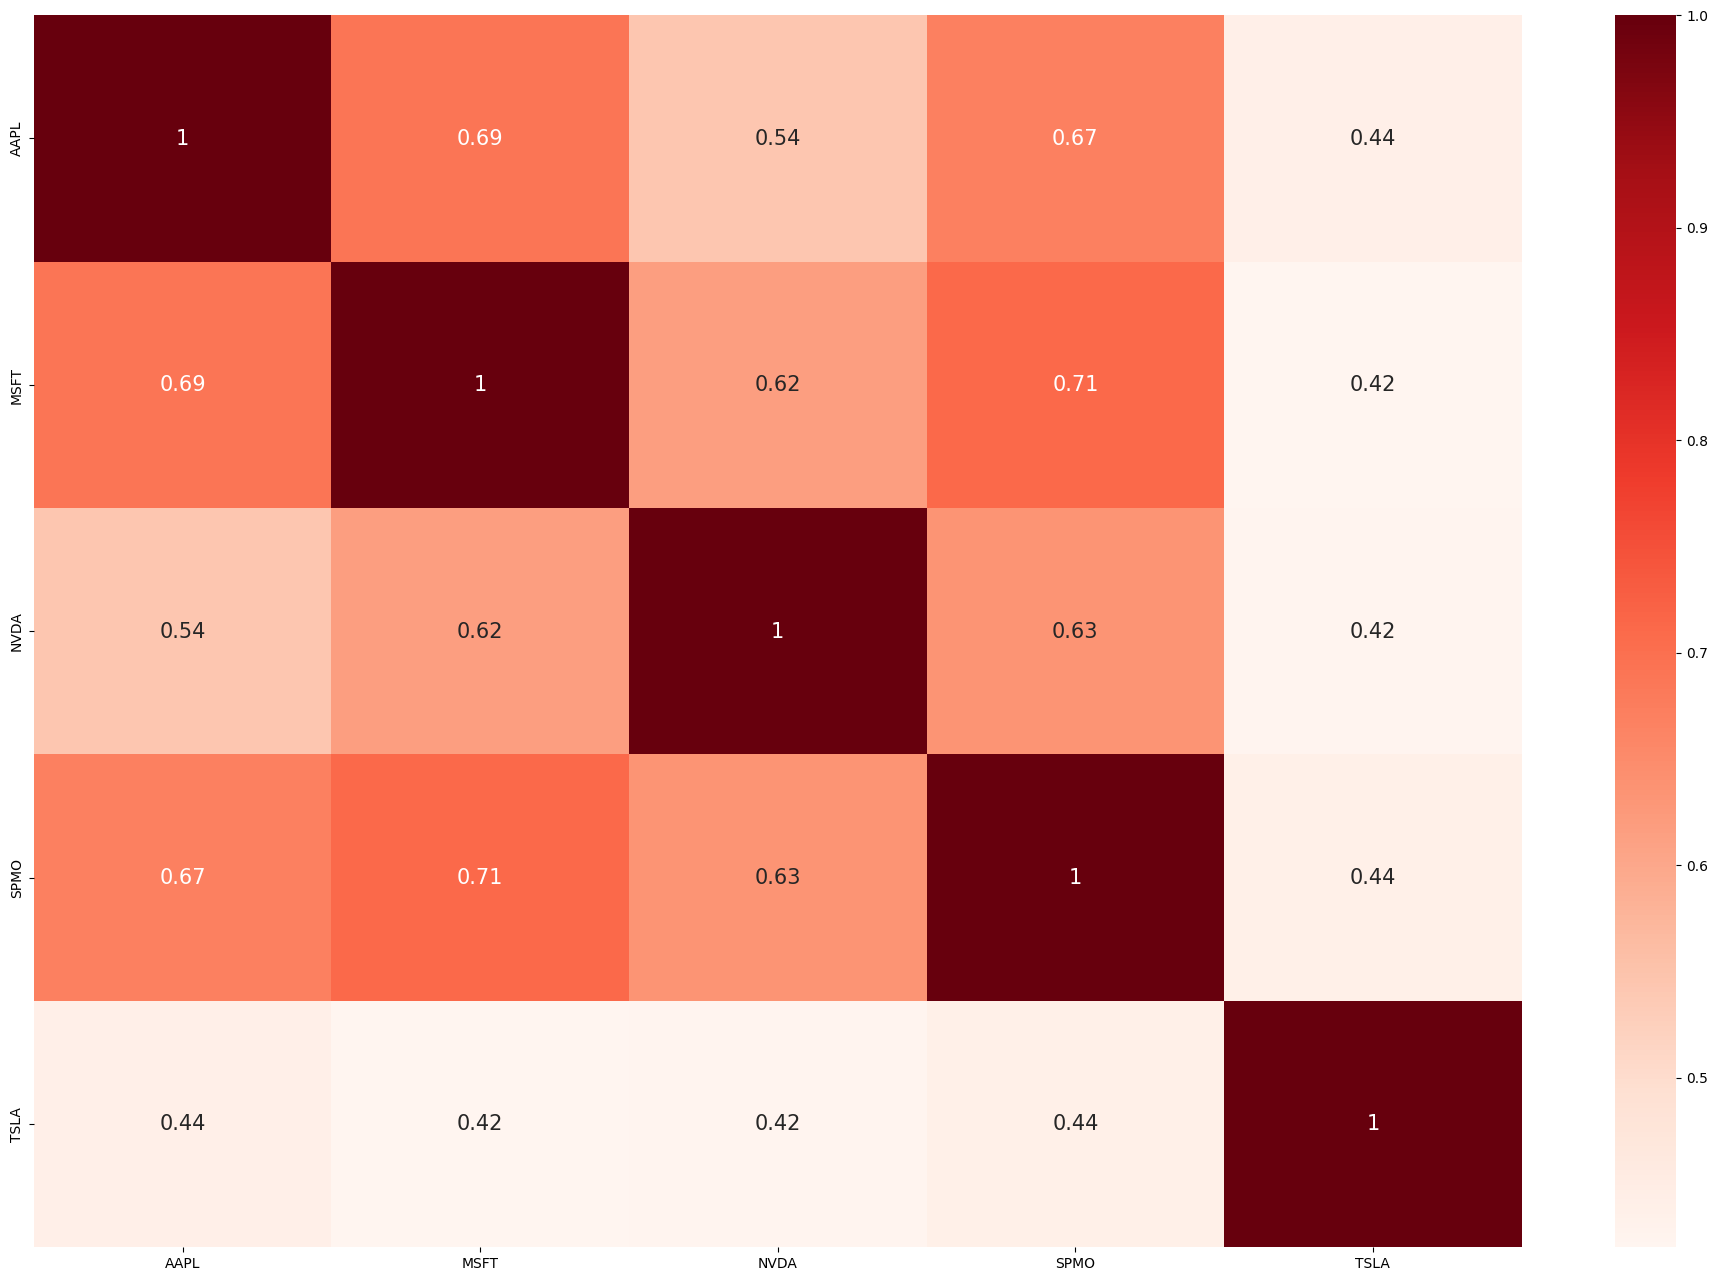

In [28]:
import seaborn as sns
plt.figure(figsize=(24,16))
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=1)
plt.show()